#Credit Risk Assessment

##Introduction
In this workbook, a credit scoring task 
is performed to assess the credit worthiness of borrowers. Using credit history of borrowers, the weight of evidence (WOE) and information value (IV) is calculated. This is added to ML model to create credit score.

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


##Data Exploration

In [2]:
import pandas as pd
import numpy  as np

datadesc = pd.read_csv('MyDrive/MLData/CreditRisk/DataDictionary.csv', header=1)
datadesc

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


In [3]:
data = pd.read_csv('MyDrive/MLData/CreditRisk/cs-training.csv')
data = data.loc[:,~data.columns.str.contains('^Unnamed')]

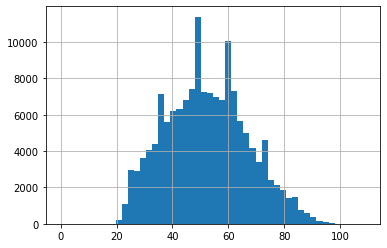

In [4]:
data.age.hist(bins=50)

In [5]:
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

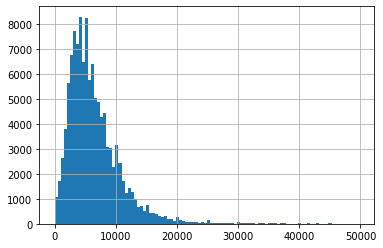

In [6]:
ff=data.MonthlyIncome.fillna(-10)
ff[(ff<50000)&(ff>0)].hist(bins=100)

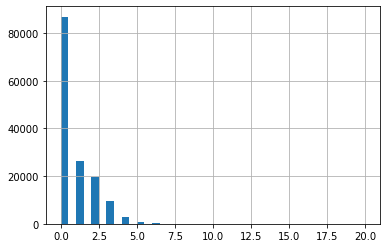

In [7]:
ff=data.NumberOfDependents
ff.hist(bins=40)

In [8]:
data['MonthlyIncome']      = data['MonthlyIncome']     .fillna(data['MonthlyIncome'].median())
#data['NumberOfDependents']= data['NumberOfDependents'].fillna(data['NumberOfDependents'].mode())
data['NumberOfDependents'] =data['NumberOfDependents'].fillna(0).isna().sum()

In [9]:
ranked_data = data['age'].rank(method='first')
quan_data   = pd.qcut(ranked_data.values,10,duplicates='drop')
quan_group  = quan_data.codes
data['age_bin'] = quan_group

In [10]:
age_quantiles = pd.qcut(data['age'],10,duplicates='drop')

In [11]:
data[['age','age_bin']]

,age,age_bin
0,45,3
1,40,2
2,38,1
3,30,0
4,49,4
...,...,...
149995,74,9
149996,44,3
149997,58,6
149998,30,0


In [12]:
data.groupby('age_bin')['SeriousDlqin2yrs'].mean()

age_bin
0    0.113733
1    0.098667
2    0.089000
3    0.082067
4    0.076800
5    0.067400
6    0.051000
7    0.039933
8    0.028000
9    0.021800
Name: SeriousDlqin2yrs, dtype: float64

In [13]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'age_bin'],
      dtype='object')

In [14]:
agebin_grp  = data.groupby('age_bin')
good_events = agebin_grp.apply(lambda x: x[x['SeriousDlqin2yrs']==0]['SeriousDlqin2yrs'].count())
bad_events  = agebin_grp.apply(lambda x: x[x['SeriousDlqin2yrs']==1]['SeriousDlqin2yrs'].count())

In [15]:
total_good = good_events.sum()
total_bad  = bad_events.sum()
f_good     = good_events/total_good
f_bad      = bad_events/total_bad

In [16]:
woe = np.log(f_good/f_bad)

In [17]:
woe

age_bin
0   -0.583114
1   -0.424147
2   -0.310368
3   -0.221682
4   -0.149634
5   -0.008944
6    0.287308
7    0.543516
8    0.910876
9    1.167529
dtype: float64

In [18]:
iv = (f_good-f_bad)*woe
iv

age_bin
0    0.043840
1    0.021643
2    0.011027
3    0.005412
4    0.002389
5    0.000008
6    0.007296
7    0.023447
8    0.056721
9    0.084309
dtype: float64

In [19]:
iv.sum()

0.2560924720535782

In [20]:
data.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_bin
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,0,3
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,0,2
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0,1
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0,0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0,4


In [21]:
data2 = data
data2[['age_bin','age']].head(5)

,age_bin,age
0,3,45
1,2,40
2,1,38
3,0,30
4,4,49


In [22]:
data2['woe_age']=list(woe[data2['age_bin']])

In [23]:
data2 = data2.drop(columns=['age','age_bin'])

In [24]:
data2

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,woe_age
0,1,0.766127,2,0.802982,9120.0,13,0,6,0,0,-0.221682
1,0,0.957151,0,0.121876,2600.0,4,0,0,0,0,-0.310368
2,0,0.658180,1,0.085113,3042.0,2,1,0,0,0,-0.424147
3,0,0.233810,0,0.036050,3300.0,5,0,0,0,0,-0.583114
4,0,0.907239,1,0.024926,63588.0,7,0,1,0,0,-0.149634
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,0,0.225131,2100.0,4,0,1,0,0,1.167529
149996,0,0.299745,0,0.716562,5584.0,4,0,1,0,0,-0.221682
149997,0,0.246044,0,3870.000000,5400.0,18,0,1,0,0,0.287308
149998,0,0.000000,0,0.000000,5716.0,4,0,0,0,0,-0.583114


##Machine Learning

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
len(data2.columns)

11

In [27]:
x_train = data2.iloc[:,1:]
y_train = data2.iloc[:,0]


In [28]:
y_=[]
for i in y_train:
  if i==0: j=1
  else:    j=0
  y_.append(j)
y_train = y_

In [29]:
data2.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
woe_age                                 0
dtype: int64

In [30]:
lr = LogisticRegression(random_state=10,
                        max_iter=500, n_jobs=-1,
                        )
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=10)

In [31]:
lr.coef_, lr.intercept_

(array([[ 4.04918507e-05, -4.92495713e-01,  3.91114326e-05,
          3.63256750e-05,  8.15468390e-03, -4.60285998e-01,
         -6.50049362e-02,  9.20807970e-01,  0.00000000e+00,
          9.54658228e-01]]), array([2.62353594]))

In [32]:
col_names = x_train.columns
coefs     = lr.coef_[0]
intercept = lr.intercept_[0]
numvars   = len(coefs)
factor    = 20/np.log(2)
offset    = 600 - factor*np.log(50)
coefs_dict = {i:j for i,j in zip(col_names.values,coefs)}#

In [33]:
def get_woe(age1):
  intervals  = age_quantiles.cat.categories
  nintervals = len(intervals)
  groupnum   = 100
  for i in range(nintervals):
    if age1 in intervals[i]:
      groupnum = i
      break
  woe_ = woe[groupnum]
  return woe_

In [34]:
get_woe(35)

-0.42414698939645074

In [44]:
age1 = 58
def get_score(age_):
  score= (coefs_dict['woe_age']*get_woe(age_)+intercept/numvars)*factor + offset/numvars
  return score

In [45]:
print ('score',get_score(age1))
print ('coef woe_age', coefs_dict['woe_age'])
print ('get_woe',get_woe(age1))
print ('intercept/numvar',intercept/numvars)
print ('factor', factor)
print ('offset', offset/numvars)

score 64.19629276625727
coef woe_age 0.9546582283522322
get_woe 0.2873081936503571
intercept/numvar 0.2623535943882506
factor 28.85390081777927
offset 48.712287620450546


##Credit Score

In [49]:
age_values = [i for i in range(20,70,10)]
print ("{:>6s} {:>6s}".format("Age","Score"))
print (10*'--')

for iag in age_values:
  print ("{:6d} {:6.2f}".format(iag,get_score(iag)))

   Age  Score
--------------------
    20  40.22
    30  40.22
    40  47.73
    50  52.16
    60  64.20


The scoring system gives output between 40-65, where typically it should be between 120-240 for age varaible. The scaling has to be adjusted to change this.

##References
[1](https://www.youtube.com/watch?v=fiQhxn9RjEQ) - Youtube - Credit Risk Analysis | Data Science/ML Project with Source Code | Learnbay Data Science Reviews
 
[2](https://www.kaggle.com/c/GiveMeSomeCredit/) - Kaggle - Give Me Some Credit